In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define the vertical filter
vertical_filter= [[-1,-2,-1], [0,0,0], [1,2,1]]

In [3]:
#define horizontal filter
horizontal_filter= [[-1,0,1], [-2,0,2], [-1,0,1]]

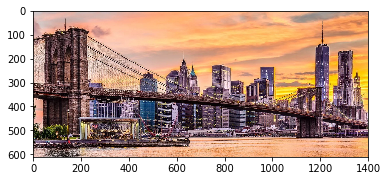

In [13]:
#read image
img = plt.imread('image.png')
plt.imshow(img, interpolation='nearest')
plt.show()

In [5]:
#get the dimensions of the image
n,m,d = img.shape

In [6]:
#initialize the edges image
edges_img = img.copy()

In [7]:
#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

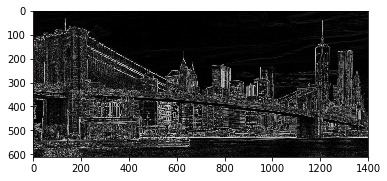

In [11]:
plt.imshow(edges_img, interpolation='nearest')
plt.show()